In [180]:
os.getcwd()
os.chdir("C:\\Users\\sinem\\Desktop")

import pandas as pd

import seaborn as sns

import os

import numpy as np

import matplotlib.pyplot as plt


In [181]:

class Information():

    def __init__(self, df):
        self.df = df

    def Describer(self):
        print(df.describe().T)
        
    def LookHead(self):
        print(df.head(6))
     
    def preprocess(self):
        missing_values = ["n/a", "na", "--", "nan"]
        df = pd.read_csv("df.csv", na_values = missing_values)
        df['bad'] = df.bad.astype('category')
        df.dropna(inplace=True)
        print (df.isnull().sum())
        print(df.info())        
     
df = pd.read_csv('df.csv')
df['bad'] = df.bad.astype('category')

a = Information(df)
a.LookHead()
a.Describer()
a.preprocess()
        



    

  bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0   0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1   0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2   0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3   0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4   0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   
5   0  17200   39316.0   66978.0  DebtCon  NaN   4.0    0.0     0.0   99.99   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
5   1.0  10.0   26.437  
          count           mean           std      min       25%        50%  \
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000   
mortdue  3262.0   74013.907992  44016.833772  2619.00  46700.25  65858.000   
value    3512.0  101076.922759  54865

In [111]:
import seaborn as sns 
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 

class Visualization:

    def __init__(self, df):

        self.df = df


    def BoxPlot(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df.boxplot()
      

df = pd.read_csv('df.csv') 
b=Visualization(df)


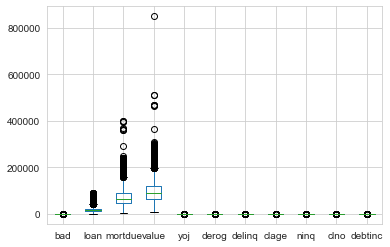

In [362]:
b.BoxPlot()

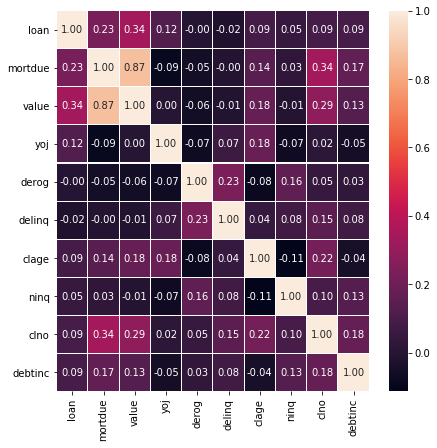

In [112]:
df2=df.copy()
df2 = df2.drop(columns=['bad' , 'job', 'reason'])    
fig,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()
#Value and mortdue have strong postive realtionship
#value and loan have weak positive relationship.

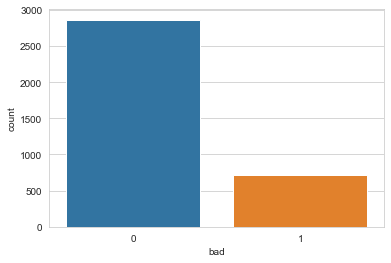

In [315]:
sns.countplot(df.bad)

In [323]:
pd.crosstab(index=df["reason"], columns=df["bad"])

#according to this; people's almost 1/4 did not pay back their credit.


bad,0,1
reason,,
DebtCon,1931,440
HomeImp,814,244


In [379]:
pd.crosstab(index=df["derog"], columns=df["bad"])

bad,0,1
derog,,
0.0,2254,452
1.0,162,103
2.0,49,49
3.0,10,25
4.0,4,10
5.0,4,4
6.0,4,6
7.0,0,7
8.0,0,3


In [182]:
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab
stats.describe(df.loan)



DescribeResult(nobs=3576, minmax=(1100, 89900), mean=18529.697986577183, variance=126851431.06960154, skewness=2.049604648222838, kurtosis=7.101453299904799)

In [387]:
shapiro(df['loan'])

#this varibale are not normally distributed

(0.8493258953094482, 0.0)

In [345]:
import scipy as cipy 
stats.levene(df.mortdue,df.value)
#H0=equal variances
#HA= not equal variances

#p-value<0.05 we'll reject null hypothesis. Their variances are not equal.

LeveneResult(statistic=27.166309046206063, pvalue=1.960277648170479e-07)

In [344]:
#Examine  whether the strong relationship between value and mortdue are valid or not

from scipy.stats import pearsonr 
 
# Convert dataframe into series 
list1 = df['value'] 
list2 = df['mortdue'] 
# Apply the pearsonr() 
pearsonr(list1, list2) 

#The pearsons correlation coefficient can be used to evaluate relationship between more than two variables.
#We can see that two variables are positively correlated and the correaltion is 0.86

#H0: correlation =0
#HA: correlation is not equal to zero



(0.8673681237221049, 0.0)

In [183]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [184]:
print(list(df.columns))
missing_values = ["n/a", "na", "--", "nan"]
df = pd.read_csv("df.csv", na_values = missing_values)
df.dropna(inplace=True)
      

['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']


In [185]:
df.dropna()
df.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [186]:
df['reason'].unique()


array(['DebtCon', 'HomeImp'], dtype=object)

In [187]:
df['job'].unique()

array(['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'], dtype=object)

In [188]:
#Create dummy variables
df = pd.get_dummies(df, columns=['job'])


In [189]:
df = pd.get_dummies(df, columns=['reason'])

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bad             2018 non-null   int64  
 1   loan            2018 non-null   int64  
 2   mortdue         2018 non-null   float64
 3   value           2018 non-null   float64
 4   yoj             2018 non-null   float64
 5   derog           2018 non-null   float64
 6   delinq          2018 non-null   float64
 7   clage           2018 non-null   float64
 8   ninq            2018 non-null   float64
 9   clno            2018 non-null   float64
 10  debtinc         2018 non-null   float64
 11  job_Mgr         2018 non-null   uint8  
 12  job_Office      2018 non-null   uint8  
 13  job_Other       2018 non-null   uint8  
 14  job_ProfEx      2018 non-null   uint8  
 15  job_Sales       2018 non-null   uint8  
 16  job_Self        2018 non-null   uint8  
 17  reason_DebtCon  2018 non-null  

# LOGISTIC REGRESSION


In [208]:
#logistic regression
df['bad'] = df.bad.astype('category')
y=df["bad"]
X=df.drop(["bad"], axis=1)
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [296]:
#scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.230402
         Iterations 8
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.230     
Dependent Variable:      bad                   AIC:                   777.7377  
Date:                    2020-08-06 15:40      BIC:                   869.3078  
No. Observations:        1614                  Log-Likelihood:        -371.87   
Df Model:                16                    LL-Null:               -483.05   
Df Residuals:            1597                  LLR p-value:           2.3083e-38
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          8.0000                                                 
--------------------------------------------------------------------------------
                Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------

In [210]:
pvalues=result.pvalues
remove=pvalues[pvalues>0.05]
remove

loan              0.061304
mortdue           0.614440
value             0.258946
yoj               0.475965
job_Mgr           1.000000
job_Office        1.000000
job_Other         1.000000
job_ProfEx        1.000000
job_Sales         1.000000
job_Self          1.000000
reason_DebtCon    1.000000
reason_HomeImp    1.000000
dtype: float64

In [211]:
X_train2=X_train.drop(remove.index,axis=1)


In [212]:
X_test2=X_test.drop(remove.index,axis=1)

In [297]:
#scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logit_model2=sm.Logit(y_train,X_train2)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.273828
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.085     
Dependent Variable: bad              AIC:              895.9182  
Date:               2020-08-06 15:40 BIC:              928.2370  
No. Observations:   1614             Log-Likelihood:   -441.96   
Df Model:           5                LL-Null:          -483.05   
Df Residuals:       1608             LLR p-value:      2.9383e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
derog      0.5281     0.1344    3.9301   0.0001    0.2648    0.7915
delinq     0.7847     0.0949    8.2729   0.0000    0.5988 

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train2, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
y_pred_train = logreg.predict(X_train2)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train2, y_train)))
y_pred_train.shape

Accuracy of logistic regression classifier on train set: 0.93


(1614,)

In [272]:
y_pred = logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test2, y_test)))


Accuracy of logistic regression classifier on test set: 0.93


(404,)

In [273]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred_train, y_train)
print(confusion_matrix)

[[1465  113]
 [   6   30]]


In [274]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred, y_test)
print(confusion_matrix)

[[368  29]
 [  1   6]]


In [276]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1471
           1       0.83      0.21      0.34       143

    accuracy                           0.93      1614
   macro avg       0.88      0.60      0.65      1614
weighted avg       0.92      0.93      0.91      1614



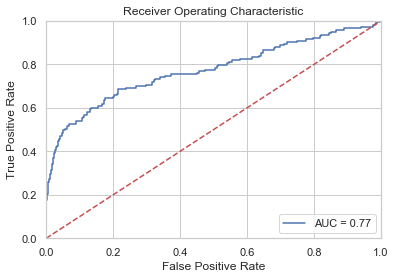

In [288]:
#ROC CURVE AND AUC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_train = logreg.predict_proba(X_train2)
preds_train = probs_train[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds_train)
roc_auc_train = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

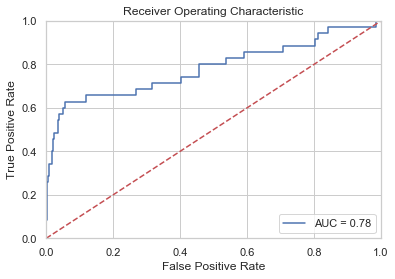

In [289]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [295]:
cross_val_score(logreg, X_test2, y_test,cv=10).mean()

0.9258536585365853